# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [75]:
# Code Here
# !pip install palmerpenguins
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [76]:
print(penguins.dtypes)

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

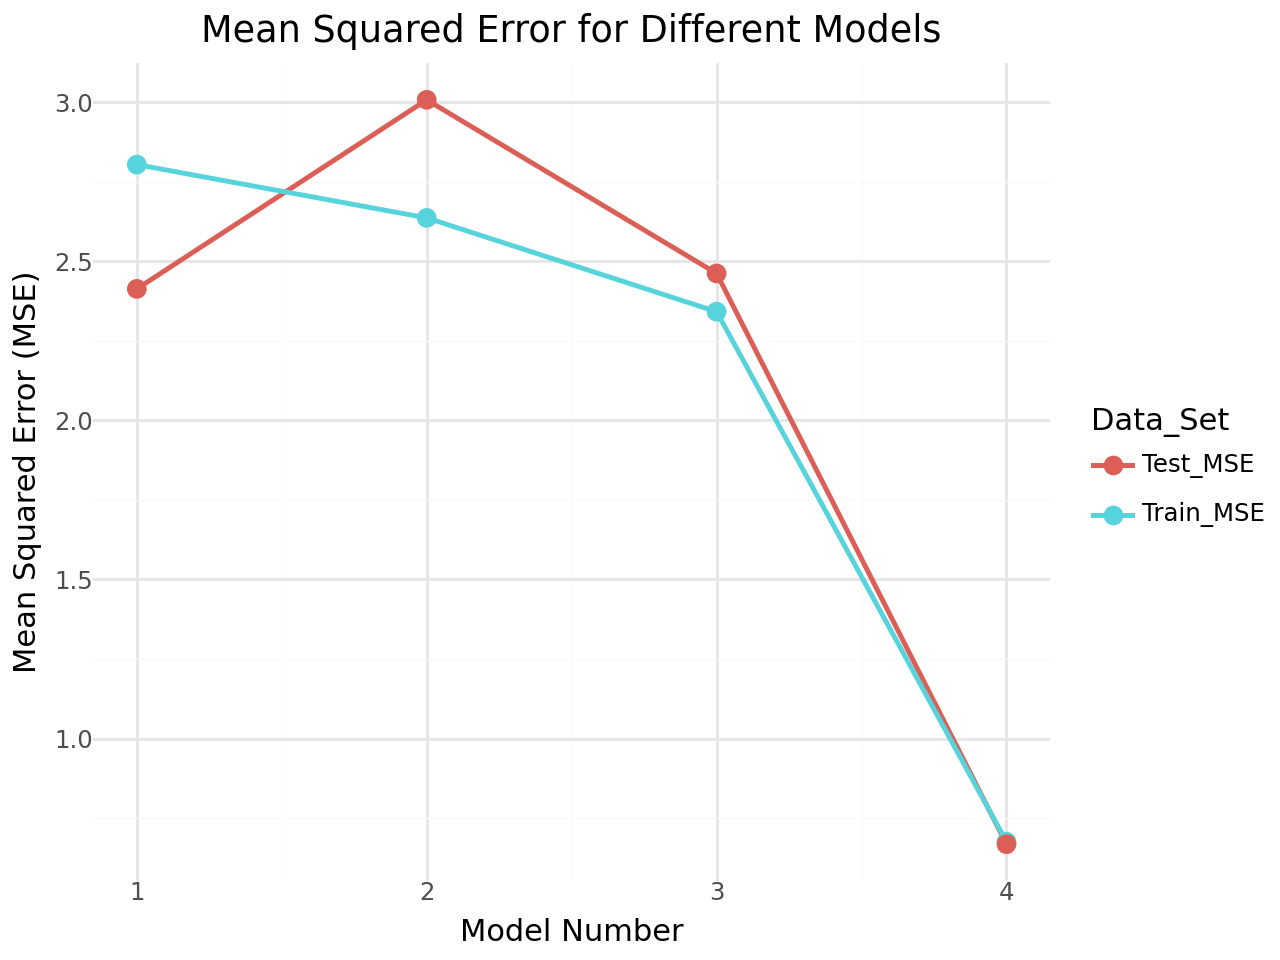

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal

penguins = penguins.dropna()

# Initialize lists to store MSE values for training and test data
train_mse_values = []
test_mse_values = []
model_numbers = []

# Define a function to fit the model and calculate MSE for both training and test sets
def fit_model(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)

    # Predict on the test set
    y_test_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)

    return train_mse, test_mse

# Model 1
X1 = penguins[['bill_length_mm', 'sex_male', 'island_Torgersen']]
train_mse, test_mse = fit_model(X1, penguins['bill_depth_mm'])
train_mse_values.append(train_mse)
test_mse_values.append(test_mse)
model_numbers.append(1)

# Model 2
X2 = penguins[['bill_length_mm', 'island_Dream', 'body_mass_g']]
train_mse, test_mse = fit_model(X2, penguins['bill_depth_mm'])
train_mse_values.append(train_mse)
test_mse_values.append(test_mse)
model_numbers.append(2)

# Model 3
X3 = penguins[['bill_length_mm', 'flipper_length_mm', 'species_Chinstrap', 'sex_nan']]
train_mse, test_mse = fit_model(X3, penguins['bill_depth_mm'])
train_mse_values.append(train_mse)
test_mse_values.append(test_mse)
model_numbers.append(3)

# Model 4
X4 = penguins[['bill_length_mm', 'species_Gentoo', 'species_Chinstrap', 'sex_male']]
train_mse, test_mse = fit_model(X4, penguins['bill_depth_mm'])
train_mse_values.append(train_mse)
test_mse_values.append(test_mse)
model_numbers.append(4)

# Create a DataFrame for plotting
results_df = pd.DataFrame({
    'Model_Number': model_numbers,
    'Train_MSE': train_mse_values,
    'Test_MSE': test_mse_values
})

# Melt the DataFrame to long format for plotting
results_long_df = results_df.melt(id_vars='Model_Number',
                                   value_vars=['Train_MSE', 'Test_MSE'],
                                   var_name='Data_Set',
                                   value_name='MSE')

# Plot using plotnine as a line plot
plot = (
    ggplot(data=results_long_df, mapping=aes(x='Model_Number', y='MSE', color='Data_Set')) +
    geom_line(size=1) +  # Line connecting the points
    geom_point(size=3) +  # Points for each model
    labs(title='Mean Squared Error for Different Models',
         x='Model Number',
         y='Mean Squared Error (MSE)') +
    theme_minimal()
)

plot


Conclusion -
Model4 is the best model since it has the lowest MSE